# <font color=purple><center> Mini Project: Detecting depression in Tweets

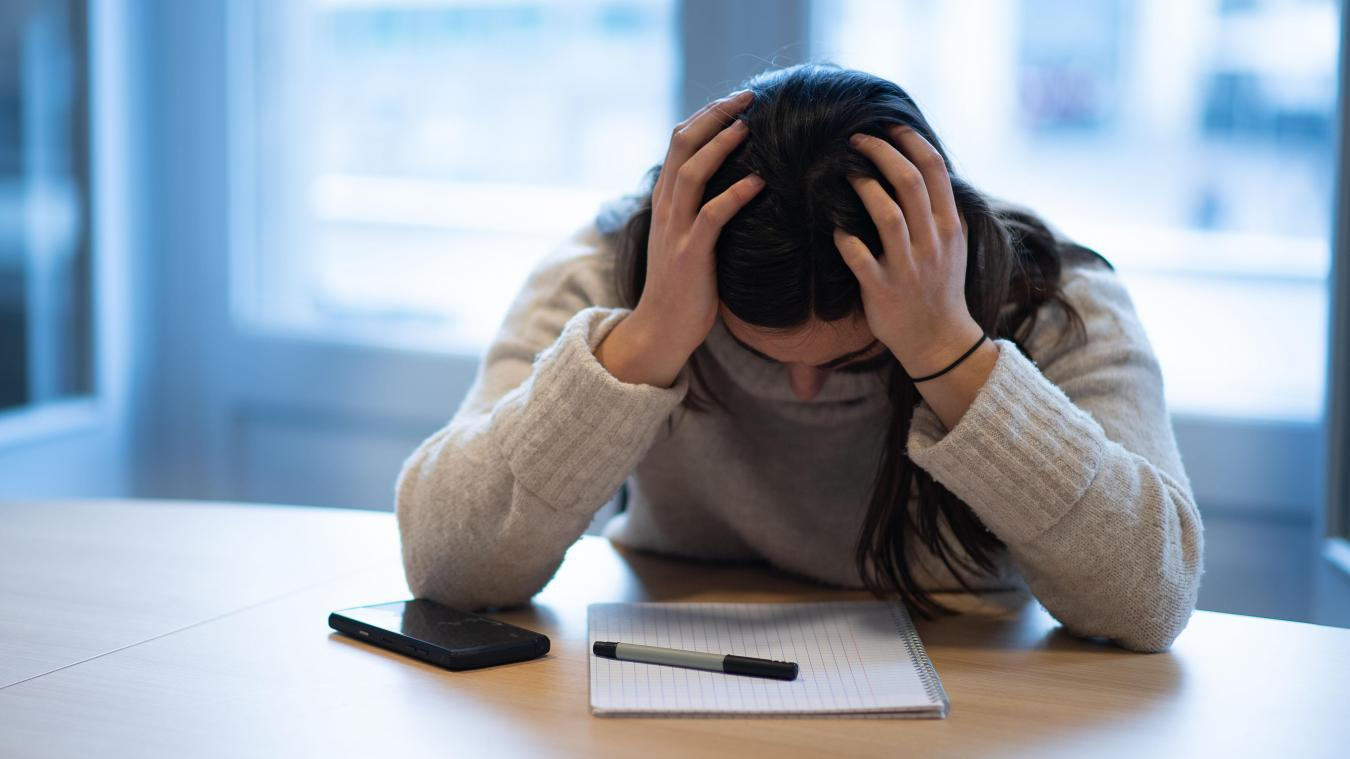

# <font color=blue> Introduction

De nos jours, les gens utilisent les médias sociaux pour exprimer leurs sentiments et partager leurs pensées et leurs désirs les plus intimes. Plus important encore, tout cela se fait de manière naturaliste, ce qui nous donne l'occasion de surmonter le problème de manipulation abordé dans les questionnaires sur la dépression autodéclarée. Ainsi, cela nous permet de capturer ces pensées dans leur forme la plus brute et de les utiliser pour identifier les l'état d'esprit actuel de l'éditeur, qui peut être utilisé, à l'aide de techniques d'analyse des sentiments, pour détecter la dépression clinique.
La dépression est une maladie courante dans le monde, avec plus de 264 millions de personnes touchées. La dépression est différente des fluctuations habituelles de l'humeur et des réactions émotionnelles de courte durée aux défis de la vie quotidienne. Surtout lorsqu'elle est de longue durée et d'intensité modérée ou sévère, la dépression peut devenir un problème de santé grave.
 Le lien entre l'utilisation des médias sociaux et la dépression est documenté depuis longtemps, certaines études ayant révélé qu'une utilisation excessive des médias sociaux peut contribuer à l'apparition de la dépression, et d'autres remarquant que les personnes déprimées publient sur leur dépression sur les réseaux sociaux.

 


# importer des bibliothèques

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import re

## Lire l'ensemble de donnée

In [17]:
data = pd.read_csv("C:/Users/lenovo/Downloads/Detecting-Depression-in-Tweets-master/Detecting-Depression-in-Tweets-master/sentiment_tweets3.csv")


In [18]:
data.shape

(10314, 3)

## Nettoyage et préparation des données

#### <font color=#FB765A> Vérifier les données

In [19]:
# Check the data
data.head(10)

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,624,so sleepy. good times tonight though,0
6,701,"@SilkCharm re: #nbn as someone already said, d...",0
7,808,23 or 24ï¿½C possible today. Nice,0
8,1193,nite twitterville workout in the am -ciao,0
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0


#### <font color=#FB765A>Suppression de colonne : "Unnamed: 0"

In [20]:
#Removing the Unnamed: 0 (we will only use the message)
data.drop(["Unnamed: 0"],axis=1,inplace=True)
data.head()

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


#### <font color=#FB765A>Convertir en minuscule

In [21]:
# Convert to lowercase

data['message'] = data['message'].apply(lambda x: x.lower())
data.head()

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat need to send 'em to my accountant tomo...,0
4,add me on myspace!!! myspace.com/lookthunder,0


#### <font color=#FB765A>Supprimer la ponctuation 

In [22]:
# Remove punctuation

import string

def punctuation_removal(message):
    all_list = [char for char in message if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['message'] = data['message'].apply(punctuation_removal)

#### <font color=#FB765A>Création d'une fonction pour  supprimer l'espace supplémentaire, chr. spécial, ulr et liens.

In [23]:
def wordopt(message):
    text = re.sub('\[.*?\]', '', message)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', message)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', message)
    text = re.sub('\n', '', message)
    text = re.sub('\w*\d\w*', '', message)
    return message

In [24]:
data["message"] = data["message"].apply(wordopt)

### Suppression des mots vides

In [25]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['message'] = data['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
data.head()

,message,label
0,real good moment missssssssss much,0
1,reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutub...,0
3,lapcat need send em accountant tomorrow oddly ...,0
4,add myspace myspacecomlookthunder,0


## Exploration de données de base

label
0    8000
1    2314
Name: message, dtype: int64


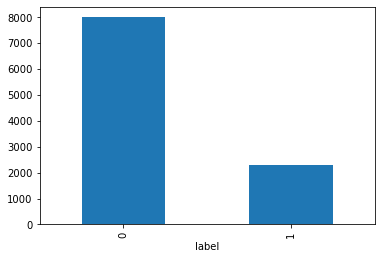

In [27]:
# How many depressed '1' and not depressed '0' ?
print(data.groupby(['label'])['message'].count())
data.groupby(['label'])['message'].count().plot(kind="bar")
plt.show()

# Analyse Wordcloud

#### <font color=#FB765A>Nuage de mot pour les gens qui sont pas déprimé

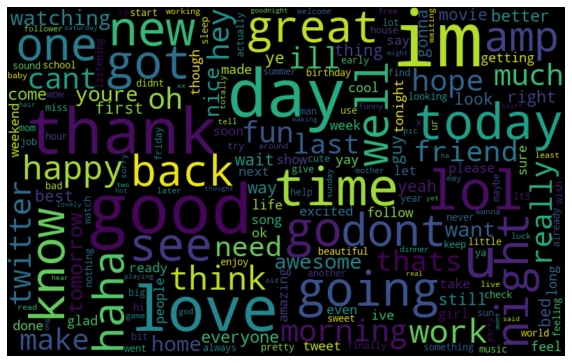

In [28]:
# Word cloud for not Depressed
from wordcloud import WordCloud

sentiment_data = data[data["label"] == 0]
all_words = ' '.join([message for message in sentiment_data.message])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### <font color=#FB765A>Nuage de mot pour les gens qui sont déprimé

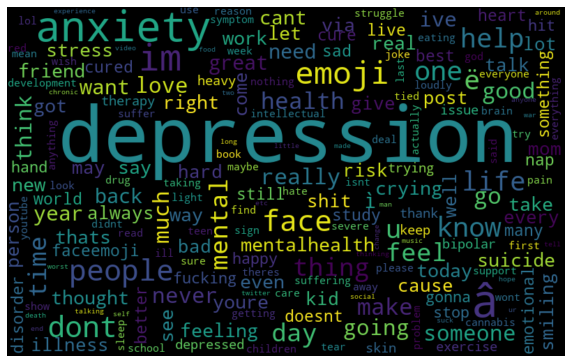

In [29]:
# Depression Tweets
from wordcloud import WordCloud

depression_data = data[data["label"] == 1]
all_words = ' '.join([message for message in depression_data.message])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Compteur de mots les plus fréquents

In [30]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(message, column_text, quantity):
    all_words = ' '.join([message for message in message[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

#### <font color=#FB765A> Mots les plus fréquents pour les gens qui non pas déprimé

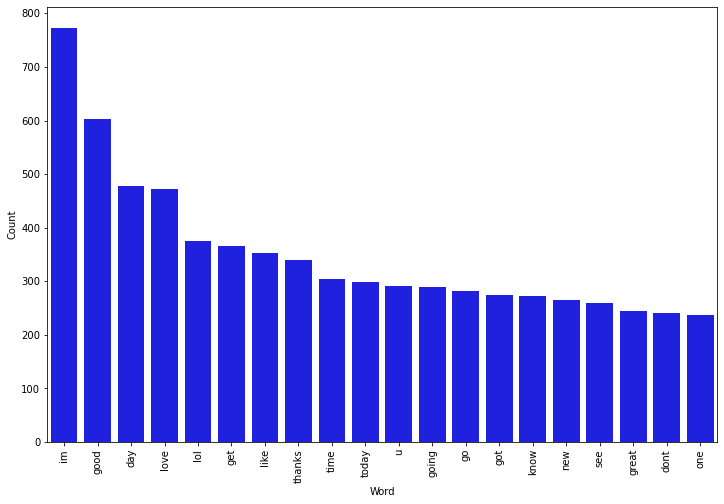

In [31]:
# Most frequent words in not Depressed
counter(data[data["label"] == 0], "message", 20)

#### <font color=#FB765A> Mots les plus fréquents pour les gens qui sont déprimé

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


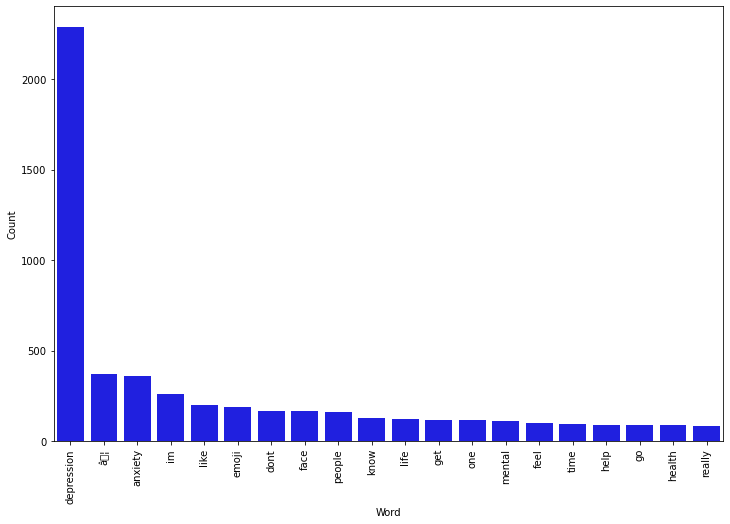

In [32]:
# Most frequent words in Depressed
counter(data[data["label"] == 1], "message", 20)

## La modélisation

#### <font color=#FB765A> Fonction pour tracer la matrice de confusion : <a>'plot_confusion_matrix'

In [33]:
# Function to plot the confusion matrix 
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### <font color=#FB765A> Définir la variable dépendante et indépendante comme x et y

In [34]:
x = data["message"]
y = data["label"]

#### <font color=#FB765A>Diviser l'ensemble de données en ensemble d'apprentissage et en ensemble de test. 

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#### <font color=#FB765A> Convertir du texte en vecteurs 

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## <font color=green>1. Régression logistique

La régression logistique est une méthode de classification linéaire qui apprend la probabilité qu'un échantillon appartienne à une certaine classe. La régression logistique tente de trouver la frontière de décision optimale qui sépare le mieux les classes.

Compte tenu du mécanisme d'apprentissage, la régression logistique est un modèle discriminatif, ce qui signifie qu'il modélise directement la probabilité a posteriori de 𝑃(𝑦|𝑥) en apprenant le mappage entrée-sortie en minimisant l'erreur.

La régression logistique divise l'espace des caractéristiques de manière linéaire et fonctionne généralement raisonnablement bien même lorsque certaines des variables sont corrélées.

Dans notre données , la régression logistique a atteint une précisions de classification de 98%.

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [40]:
pred_lr=LR.predict(xv_test)

In [41]:
LR.score(xv_test, y_test)

0.9852656068243505

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1975
           1       1.00      0.94      0.97       604

    accuracy                           0.99      2579
   macro avg       0.99      0.97      0.98      2579
weighted avg       0.99      0.99      0.99      2579



Confusion matrix, without normalization


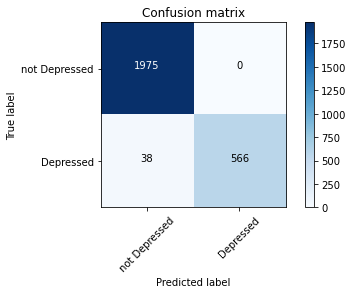

In [44]:
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['not Depressed', 'Depressed'])

## <font color=green>2. L'arbre de décision

Un arbre de décision est un outil d'aide à la décision représentant un ensemble de choix sous la forme graphique d'un arbre. Les différentes décisions possibles sont situées aux extrémités des branches, et sont atteintes en fonction de décisions prises à chaque étape.
L’apprentissage par arbre de décision désigne une méthode basée sur l'utilisation d'un arbre de décision comme modèle prédictif. On l'utilise notamment en fouille de données et en apprentissage automatique.

Dans ces structures d'arbre, les feuilles représentent les valeurs de la variable-cible et les embranchements correspondent à des combinaisons de variables d'entrée qui mènent à ces valeurs. En analyse de décision, un arbre de décision peut être utilisé pour représenter de manière explicite les décisions réalisées et les processus qui les amènent. En apprentissage et en fouille de données, un arbre de décision décrit les données mais pas les décisions elles-mêmes, l'arbre serait utilisé comme point de départ au processus de décision.

C'est une technique d'apprentissage supervisé : on utilise un ensemble de données pour lesquelles on connaît la valeur de la variable-cible afin de construire l'arbre (données dites étiquetées), puis on extrapole les résultats à l'ensemble des données de test. Les arbres de décision font partie des algorithmes les plus populaires en apprentissage automatique.<br>Dans notre mini projet , la régression logistique a atteint une précisions de classification de 92%.

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [47]:
pred_dt = DT.predict(xv_test)

In [48]:
DT.score(xv_test, y_test)

0.9154711128344319

In [49]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1975
           1       0.74      0.98      0.84       604

    accuracy                           0.92      2579
   macro avg       0.87      0.94      0.89      2579
weighted avg       0.93      0.92      0.92      2579



Confusion matrix, without normalization


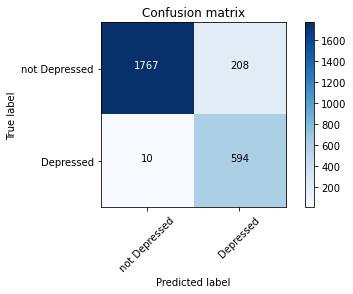

In [50]:
cm = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm, classes=['not Depressed', 'Depressed'])

## <font color=green>3.  Gradient Boosting Classifier 

Le renforcement du gradient est un type de boosting d'apprentissage de la machine. Il repose fortement sur la prédiction que le prochain modèle réduira les erreurs de prédiction lorsqu'il sera mélangé avec les précédents.Le renforcement du gradient est une technique populaire parmi les spécialistes des données en raison de sa précision et de sa rapidité, en particulier pour les données complexes et volumineuses.Les classificateurs à renforcement de gradient sont un groupe d’algorithmes d’apprentissage automatique qui combinent de nombreux modèles d’apprentissage faibles pour créer un modèle prédictif solide. Les arbres de décision sont généralement employés lors de l’augmentation de gradient. Les modèles de renforcement du gradient sont populaires en raison de leur efficacité à classer des ensembles de données complexes et on les a récemment utilisés pour gagner de nombreux concours scientifiques de données Kaggle.

La bibliothèque d’apprentissage automatique Python, Scikit-Learn, prend en charge différentes implémentations de classificateurs d’amplification de gradient, y compris XGBoost.<br>Dans notre  données de mini projet, Gradient Boosting Classifier avait globalement les meilleures performances, en obtenant des précisions de classification de 99%.

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

In [134]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [135]:
pred_gbc = GBC.predict(xv_test)

In [136]:
GBC.score(xv_test, y_test)

0.9899185730903451

In [137]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2019
           1       0.99      0.96      0.98       560

    accuracy                           0.99      2579
   macro avg       0.99      0.98      0.98      2579
weighted avg       0.99      0.99      0.99      2579



Confusion matrix, without normalization


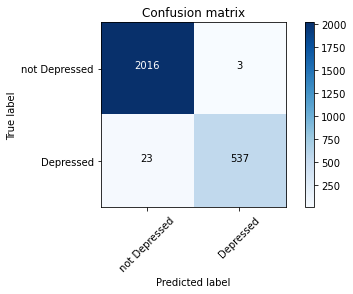

In [150]:
cm = metrics.confusion_matrix(y_test, pred_gbc)
plot_confusion_matrix(cm, classes=['not Depressed', 'Depressed'])

## <font color=green>4. Forêt aléatoire 

Les **forêts aléatoires** ou forêts de décision aléatoires sont une méthode d'apprentissage d'ensemble pour la classification, la régression et d'autres tâches qui fonctionnent en construisant une multitude d'arbres de décision au moment de la formation et en produisant la classe qui est le mode des classes (classification) ou moyenne /prédiction moyenne (régression) des arbres individuels. Random Forest fonctionne bien avec un mélange de caractéristiques numériques et catégorielles. Lorsque les caractéristiques sont sur les différentes échelles, c'est aussi bien. Plus précisement:

1. Met l'accent sur la sélection des fonctionnalités - considère certaines fonctionnalités comme plus importantes que d'autres.
2. Ne suppose pas que le modèle a une relation linéaire - comme le font les modèles de régression.
3. Utilisez ensemble l'apprentissage. Si nous devions utiliser un seul arbre de décision, nous n'utiliserions pas l'apprentissage d'ensemble.

Dans les données de l'application actuelle, avec Random Forests  en obtenant une précisions de classification de 94 % .

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [141]:
pred_rfc = RFC.predict(xv_test)

In [142]:
RFC.score(xv_test, y_test)

0.944939899185731

In [144]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2019
           1       0.82      0.96      0.88       560

    accuracy                           0.94      2579
   macro avg       0.90      0.95      0.92      2579
weighted avg       0.95      0.94      0.95      2579



Confusion matrix, without normalization


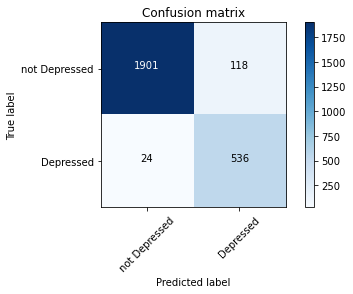

In [149]:
cm = metrics.confusion_matrix(y_test, pred_rfc)
plot_confusion_matrix(cm, classes=['not Depressed', 'Depressed'])

# Test de modèle avec saisie manuelle

In [153]:
def output_lable(n):
    if n == 0:
        return "not Depressed"
    elif n == 1:
        return "Depressed"
    
def manual_testing(msgs):
    testing_msgs = {"message":[msgs]}
    msg_def_test = pd.DataFrame(testing_msgs)
    msg_def_test["message"] = msg_def_test["message"].apply(wordopt) 
    msg_x_test = msg_def_test["message"]
    msg_xv_test = vectorization.transform(msg_x_test)
    pred_LR = LR.predict(msg_xv_test)
    pred_DT = DT.predict(msg_xv_test)
    pred_GBC = GBC.predict(msg_xv_test)
    pred_RFC = RFC.predict(msg_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

# <font color=#2CA2A8>Test

Test de modèle avec saisie manuelle (<a>input)

In [ ]:
message = str(input())
manual_testing(message)

Aprés en saisie une phrase par exemple : <a>good times tonight</a><br> <br> Et on obtient le résultat avec les quatre modèle que nous avons utilisé: <font color=green><br>-LogisticRegression(LR).<br>
-DecisionTreeClassifier(DT).<br>
-GradientBoostingClassifier(GBC).<br>
-RandomForestClassifier(RFC).<br>

In [156]:
message = str(input())
manual_testing(message)

good times tonight


LR Prediction: not Depressed 
DT Prediction: not Depressed 
GBC Prediction: not Depressed 
RFC Prediction: not Depressed


Une autre exemple (<a>Exemple de dépression)

In [155]:
message = str(input())
manual_testing(message)

no tears left to cry ended depression


LR Prediction: Depressed 
DT Prediction: Depressed 
GBC Prediction: Depressed 
RFC Prediction: Depressed



# <font color=blue>Conclusion 

 L'objectif de notre étude était de<b> résoudre l'un des plus grands problèmes de santé mentale</b>, à savoir l'inefficacité des méthodes traditionnelles.
méthodes d'identification des maladies mentales. Plus précisément, nous avons choisi de nous concentrer sur le trouble dépressif majeur, aussi appelé dépression clinique, en raison de sa grande popularité et de sa probabilité de propagation, et surtout, pour prévenir les tragédies qui pourrait résulter d'un tel trouble. Pour cela, nous avons voulu concevoir et proposer une nouvelle façon d'identifier la dépression à l'aide des modèles de machines learning telles que : 

<font color=green>-LogisticRegression.<br>
-DecisionTreeClassifier.<br>
-GradientBoostingClassifier.<br>
-RandomForestClassifier.<br>

 L'utilisation de marqueurs linguistiques comme outil d'analyse et de diagnostic de la dépression présente un énorme potentiel. La dépression peut être si rapidement vue dans le texte, même sans l'utilisation de modèles complexes. Simplement en collectant, nettoyant et traitant les données disponibles, l'analyse visuelle seule peut éclairer la différence entre les Tweets aléatoires et les Tweets qui ont des caractéristiques dépressives.

Dans notre  données de mini projet, Gradient Boosting Classifier avait globalement les meilleures performances, en obtenant des précisions de classification de 99%.

<B>FIN